# Predizione di malattie cardiache


Prevedere se un paziente ha probabilità una malattia cardiaca o meno. Abbiamo un dato che classifica se i pazienti hanno o meno malattie cardiache in base alle caratteristiche in esso contenute. Cercheremo di utilizzare questi dati per creare un modello che tenti di prevedere se un paziente ha questa malattia o meno.

Il set di dati è memorizzato nel file heart.csv e preso da https://archive.ics.uci.edu/ml/datasets/Heart+Malattia

In [1]:
import sys
import os 
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt

## Lettura e preparazione del dato

In [2]:
data = pd.read_csv('../data/heart.csv')

In [27]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predict,predict2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,0


In [23]:
len(data[data['target']==1]), len(data[data['target']==0])

(165, 138)

In [4]:
X = data[['age', 'sex', 'cp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

In [5]:
X

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,233,1,0,150,0,2.3,0,0,1
1,37,1,2,250,0,1,187,0,3.5,0,0,2
2,41,0,1,204,0,0,172,0,1.4,2,0,2
3,56,1,1,236,0,1,178,0,0.8,2,0,2
4,57,0,0,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,241,0,1,123,1,0.2,1,0,3
299,45,1,3,264,0,1,132,0,1.2,1,0,3
300,68,1,0,193,1,1,141,0,3.4,1,2,3
301,57,1,0,131,0,1,115,1,1.2,1,1,3


In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Questo primo step prevede la divisione del dataset in train and test (80/20), inoltre sarà effettuata uno scaling dimensionale per preparare il dato per la previisione.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocessing: standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
X_train_val = scaler.transform(x_train)
X_test_val = scaler.transform(x_test)

In [8]:
#! pip install tensorflow

In [9]:
len(x_train), len(y_train), len(x_test), len(y_test), len(X_train_val), len(X_test_val)

(242, 242, 61, 61, 242, 61)

## Modello con un percettrone e Predizione

### Compilazione del modello

La rete neurale sarà così composta:  
- 12 parametri in entrata con 2 neuroni nel primo layer e funzione d'attivazione **Relu**
- 2 neuroni nel secondo layer e funzione d'attivazione **Relu**
- 2 neuroni con funzione d'attivazione **Sigmoid**
- compilazione del modello con funzione di perdita **binary_crossentropy** e l'ottimizzatore **adam** 
- metrica di riferimento: **l'accuracy**
https://github.com/keras-team/keras/issues/2645

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU

NDIM = len(X)
model = Sequential()

model.add(Dense(2, input_dim=12)) # 12 parametri con due neuroni
model.add(ReLU()) # funzione di attivazione RELU
model.add(Dense(2)) # Layer con 2 neuroni  
model.add(ReLU()) # funzione di attivazione RELU
model.add(Dense(1, activation='sigmoid')) # layer con 1 neurone e funzione d'attivazione sigmoid

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
# si compila il modello con la funziona di perdita binary_crossentropy e l'ottimizzatore adam 
# la metrica di riferimento è l'accuracy

model.summary()

2022-07-18 15:31:13.282269: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-18 15:31:13.282329: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 re_lu (ReLU)                (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 re_lu_1 (ReLU)              (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


2022-07-18 15:31:15.532864: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-18 15:31:15.532926: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-18 15:31:15.532948: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (736f572238ae): /proc/driver/nvidia/version does not exist
2022-07-18 15:31:15.533199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Allenamento della rete

La rete è stata allenata con inizialmente su 1000 epoche ma, come si può evincere dal grafico (creato da un run precendente) dopo alcune epoche il modello tende ad overfittare. 

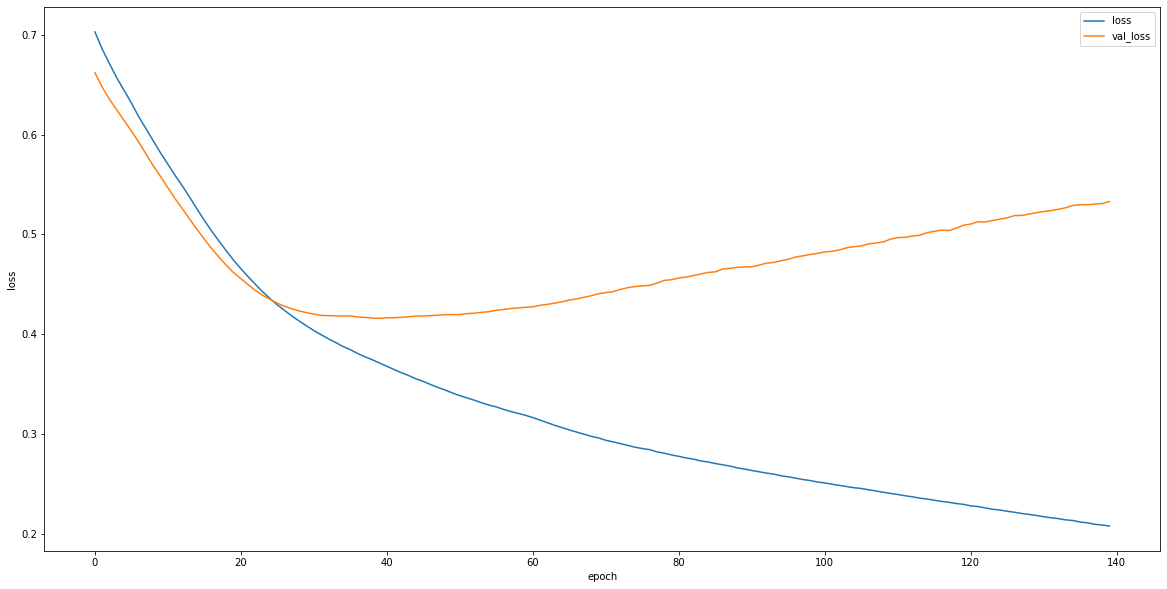

Per questo motivo si è deciso di trainare il modello sempre su 1000 epoche ma inserendo una funzione **EarlyStopping**.
Questa funzione consente di monitorare una metrica come **loss** o **val_loss** e inserire uno stop anticipato.   

Il parametro scelto è il **val_loss** (il quale corrisponde all'errore del modello nel set di validazione) e come parametro di stop il **patience** questo elemento conta il numero di epoche in cui il modello non riceve miglioramenti.  
Nel nostro caso è stato un valore pari a 15

In [11]:
from keras.callbacks import EarlyStopping


In [12]:
# early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

history = model.fit(X_train_val,
                    y_train,
                    epochs=1000, 
                    verbose=1, # switch to 0 for less verbosity 
                    callbacks=[early_stopping], 
                    validation_data=(X_test_val, y_test))

Epoch 1/1000
8/8 [==============================] - 1s 25ms/step - loss: 0.6463 - accuracy: 0.6074 - val_loss: 0.6858 - val_accuracy: 0.5410
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6402 - accuracy: 0.5992 - val_loss: 0.6800 - val_accuracy: 0.5738
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6346 - accuracy: 0.6116 - val_loss: 0.6747 - val_accuracy: 0.5738
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6295 - accuracy: 0.6281 - val_loss: 0.6691 - val_accuracy: 0.5902
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6236 - accuracy: 0.6364 - val_loss: 0.6633 - val_accuracy: 0.6066
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6185 - accuracy: 0.6322 - val_loss: 0.6575 - val_accuracy: 0.6230
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.6488 - val_loss: 0.6526 - val_accuracy: 0.6230
Epoch 8/1000
8/8 [=

8/8 [==============================] - 0s 5ms/step - loss: 0.3652 - accuracy: 0.8430 - val_loss: 0.4488 - val_accuracy: 0.8525
Epoch 118/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3644 - accuracy: 0.8430 - val_loss: 0.4485 - val_accuracy: 0.8525
Epoch 119/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3638 - accuracy: 0.8430 - val_loss: 0.4478 - val_accuracy: 0.8525
Epoch 120/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3631 - accuracy: 0.8430 - val_loss: 0.4470 - val_accuracy: 0.8689
Epoch 121/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3621 - accuracy: 0.8430 - val_loss: 0.4469 - val_accuracy: 0.8689
Epoch 122/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3614 - accuracy: 0.8430 - val_loss: 0.4458 - val_accuracy: 0.8689
Epoch 123/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3605 - accuracy: 0.8430 - val_loss: 0.4451 - val_accuracy: 0.8689
Epoch 124/1000
8/8 [=

In [13]:
plt.rcParams.update({'figure.figsize': (20, 10)})

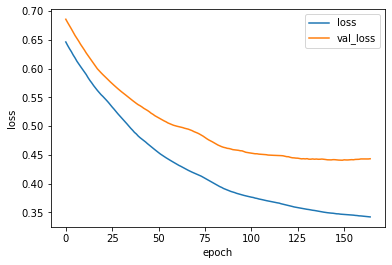

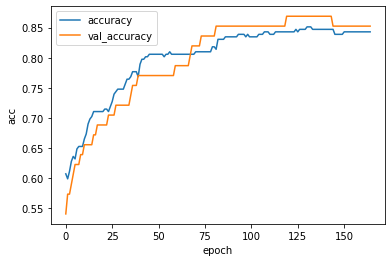

In [14]:
# plot loss vs epoch
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# plot accuracy vs epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="upper left")
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

### Predizione

In [15]:
import numpy as np
df_all = data
X_val = scaler.transform(X)
df_all['predict'] = model.predict(X_val)

df_all['predict'] = np.around(df_all['predict']).astype(np.int64)
df_all['target'] = np.around(df_all['target']).astype(np.int64)

df_all

10/10 [==============================] - 0s 1ms/step


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predict
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


### Valutazione

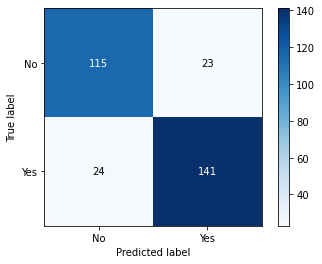

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_all['target'].array, df_all['predict'].array)
classes = ['No', 'Yes']

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)

ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

## Modello con due percettroni e Predizione

In [17]:
model2 = Sequential()

model2.add(Dense(12, input_dim=12))
model2.add(ReLU())
model2.add(Dense(units=2))
model2.add(ReLU())
model2.add(Dense(units=2, activation='softmax'))


model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 re_lu_2 (ReLU)              (None, 12)                0         
                                                                 
 dense_4 (Dense)             (None, 2)                 26        
                                                                 
 re_lu_3 (ReLU)              (None, 2)                 0         
                                                                 
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________


In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

history = model2.fit(X_train_val,
                    y_train,
                    epochs=1000, 
                    verbose=1, # switch to 0 for less verbosity 
                    callbacks=[early_stopping], 
                    validation_data=(X_test_val, y_test))

Epoch 1/1000
8/8 [==============================] - 1s 43ms/step - loss: 0.6814 - accuracy: 0.4917 - val_loss: 0.6710 - val_accuracy: 0.5410
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.5248 - val_loss: 0.6668 - val_accuracy: 0.5574
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6690 - accuracy: 0.5331 - val_loss: 0.6625 - val_accuracy: 0.5902
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.5620 - val_loss: 0.6578 - val_accuracy: 0.5902
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6565 - accuracy: 0.5868 - val_loss: 0.6528 - val_accuracy: 0.6066
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6493 - accuracy: 0.6116 - val_loss: 0.6475 - val_accuracy: 0.6066
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6415 - accuracy: 0.6157 - val_loss: 0.6418 - val_accuracy: 0.5902
Epoch 8/1000
8/8 [=

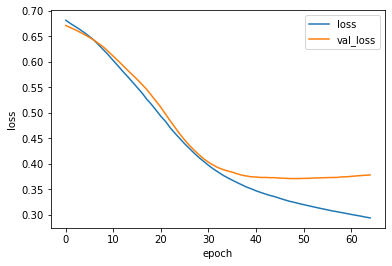

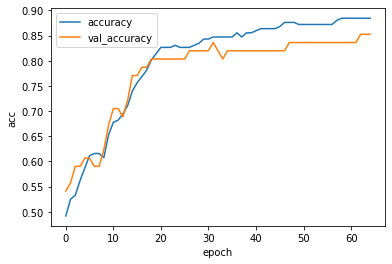

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# plot accuracy vs epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="upper left")
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [20]:
df_all = data
X_val = scaler.transform(X)
df_all['predict2'] = model.predict(X_val)

df_all['predict2'] = np.around(df_all['predict2']).astype(np.int64)
df_all['target'] = np.around(df_all['target']).astype(np.int64)

df_all

10/10 [==============================] - 0s 1ms/step


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predict,predict2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,0


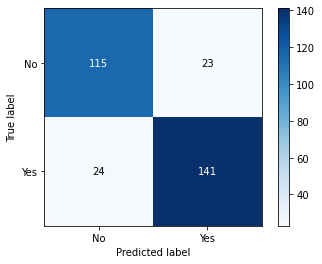

In [21]:
cm = confusion_matrix(df_all['target'].array, df_all['predict2'].array)
classes = ['No', 'Yes']

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)

ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

In [28]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predict,predict2
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,-0.255722,-0.255722
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.313759,-0.313759
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,0.484764,0.484764
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,-0.039074,-0.039074
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,-0.031398,-0.031398
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.011986,0.011986
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,0.105965,0.105965
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,0.492649,0.492649
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,-0.446015,-0.446015
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,-0.517074,-0.517074
